In [2]:
from google.colab import files
zoodata=files.upload()

Saving zoo-data.csv to zoo-data.csv


In [3]:
from google.colab import files
zootype=files.upload()

Saving zoo-class-type.csv to zoo-class-type.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [5]:
zoo_data = pd.read_csv('zoo-data.csv')
zoo_class = pd.read_csv('zoo-class-type.csv')
merged_data = pd.merge(zoo_data, zoo_class, left_on='class_type', right_on='Class_Number')
merged_data = merged_data.drop(['Animal_Names', 'Number_Of_Animal_Species_In_Class', 'Class_Number','class_type','animal_name'], axis=1)
X = merged_data.drop('Class_Type', axis=1)
y = merged_data['Class_Type']
print(merged_data.head())

   hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   
2     0         0     1     0         0        1         1        1         1   
3     1         0     0     1         0        0         1        1         1   
4     1         0     0     1         0        0         1        1         1   

   breathes  venomous  fins  legs  tail  domestic  catsize Class_Type  
0         1         0     0     4     0         0        1     Mammal  
1         1         0     0     4     1         0        1     Mammal  
2         0         0     1     0     1         0        0       Fish  
3         1         0     0     4     0         0        1     Mammal  
4         1         0     0     4     1         0        1     Mammal  


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9523809523809523


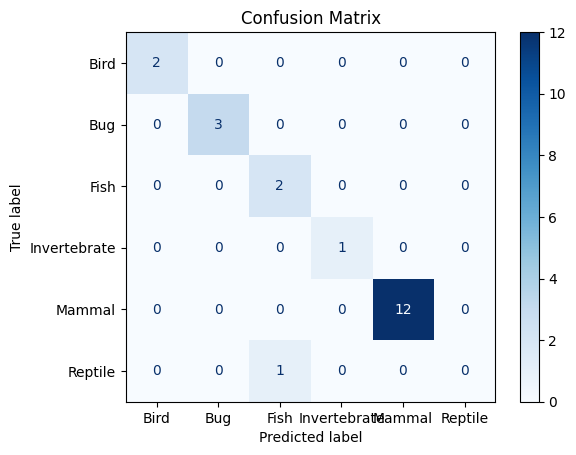

In [16]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()